# Examining circuit statistics

What kind of features are most predictive of mutational stability?

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import corner
import sys
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px


if __package__ is None:

    module_path = os.path.abspath(os.path.join('..'))
    sys.path.append(module_path)

    __package__ = os.path.basename(module_path)


from synbio_morpher.srv.sequence_exploration.sequence_analysis import b_tabulate_mutation_info
from synbio_morpher.utils.data.data_format_tools.common import load_json_as_dict
from synbio_morpher.utils.common.setup import prepare_config
from synbio_morpher.utils.circuit.agnostic_circuits.circuit_manager import CircuitModeller
from synbio_morpher.utils.evolution.evolver import Evolver
from synbio_morpher.utils.misc.numerical import count_monotonic_group_lengths, find_monotonic_group_idxs, is_within_range
from synbio_morpher.utils.misc.string_handling import string_to_tuple_list
from synbio_morpher.utils.misc.type_handling import flatten_listlike, get_first_elements
from synbio_morpher.utils.results.analytics.naming import get_analytics_types_all, get_true_names_analytics, get_true_interaction_cols
from synbio_morpher.utils.common.testing.shared import create_test_inputs, CONFIG, TEST_CONFIG, five_circuits, mutate, simulate
from explanations.data_enhancing import proc_info, melt, summ, summ_energies

SEQ_LENGTH = 20
config = deepcopy(CONFIG)

In [3]:
fn = '../data/ensemble_mutation_effect_analysis/2023_06_05_164913/summarise_simulation/tabulated_mutation_info.csv'
info = pd.read_csv(fn)

In [ ]:
info, num_group_cols, num_bs_cols, numerical_cols, key_cols, mutation_log, bs_range_cols = proc_info(info)

In [ ]:
# info[info['sample_name'] == 'RNA_0']
infom = melt(info[info['sample_name'] == 'RNA_0'], num_group_cols, num_bs_cols, numerical_cols, key_cols, mutation_log, bs_range_cols, include_log=True)


In [6]:


# %%
# circuits, config, result_writer, info = create_test_inputs(deepcopy(CONFIG))

# circuits, config, data_writer = five_circuits(config, data_writer=None)

# %%

# circuits, config, data_writer = mutate(circuits, config, data_writer)

# %%

# circuits, config, data_writer = simulate(circuits, config, data_writer)

# %%


# info = b_tabulate_mutation_info(data_writer.ensemble_write_dir,
#                                 data_writer=data_writer, experiment_config=config)

# %%
# circuits = [Evolver(data_writer=result_writer,
#                     sequence_type=config.get('system_type')).mutate(
#             c,
#             write_to_subsystem=True,
#             algorithm=config.get('mutations', {}).get('algorithm', 'random')) for c in circuits]
# circuit_modeller = CircuitModeller(result_writer=result_writer, config=config)
# circuits = circuit_modeller.batch_circuits(
#     circuits=circuits,
#     methods={
#         "compute_interactions": {},
#         "init_circuits": {'batch': True},
#         'simulate_signal_batch': {'ref_circuit': None,
#                                   'batch': config['simulation']['use_batch_mutations']},
#         'write_results': {'no_visualisations': False, # config['experiment']['no_visualisations'],
#                           'no_numerical': False} #config['experiment']['no_numerical']}
#     }
# )


## Process summary

In [7]:

# # %%
# info['sp_distance'] = 0 
# info.loc[(info['sensitivity'] <= 1) & (info['precision'] <= 10), 'sp_distance'] = np.sqrt(
#     np.power(1-info['sensitivity'], 2) + np.power(10 - info['precision'], 2))
# info.loc[(info['sensitivity'] <= 1) & (info['precision'] > 10), 'sp_distance'] = np.absolute(info['sensitivity'] - 1)
# info.loc[(info['sensitivity'] > 1) & (info['precision'] <= 10), 'sp_distance'] = np.absolute(info['precision'] - 10)


Binding sites:

In [8]:

# # %%
# num_group_cols = [e.replace('energies', 'binding_sites_groups') for e in get_true_interaction_cols(info, 'energies')]
# num_bs_cols = [e.replace('energies', 'binding_sites_count') for e in get_true_interaction_cols(info, 'energies')]
# bs_idxs_cols = [e.replace('energies', 'binding_sites_idxs') for e in get_true_interaction_cols(info, 'energies')]
# bs_range_cols = [e.replace('energies', 'binding_site_group_range') for e in get_true_interaction_cols(info, 'energies')]


# # %%
# for b, g, bs, bsi, r in zip(get_true_interaction_cols(info, 'binding_sites'), num_group_cols, num_bs_cols, bs_idxs_cols, bs_range_cols):
#     fbs = [string_to_tuple_list(bb) for bb in info[b]]
#     first = get_first_elements(fbs, empty_replacement=[])
#     info[bs] = [count_monotonic_group_lengths(bb) for bb in first]
#     info[bsi] = [find_monotonic_group_idxs(bb) for bb in first]
#     info[g] = info[bs].apply(len)
#     info[r] = [[(bb[0], bb[-1]) for bb in b] for b in info[bsi]]

Melt energies:


In [9]:

# # %%
# good_cols = list(info.columns)
# [good_cols.remove(x) for x in get_true_interaction_cols(info, 'binding_rates_dissociation') + get_true_interaction_cols(info, 'eqconstants') +
#  get_true_interaction_cols(info, 'energies') + get_true_interaction_cols(info, 'binding_sites') + num_group_cols + num_bs_cols]
# good_cols


# # %%
# binding_idx_map = {e.replace('energies_', ''): i for i, e in enumerate(get_true_interaction_cols(info, 'energies'))}

# # %%
# infom = info.melt(good_cols, value_vars=get_true_interaction_cols(info, 'energies'), var_name='energies_idx', value_name='energies')
# dfm = info.melt(good_cols, value_vars=num_group_cols, var_name='num_groups_idx', value_name='num_groups')
# infom['idx_species_binding'] = dfm['num_groups_idx'].apply(lambda x: binding_idx_map[x.replace('binding_sites_groups_', '')])
# infom['num_groups'] = dfm['num_groups']
# dfm = info.melt(good_cols, value_vars=num_bs_cols, var_name='num_bs_idx', value_name='num_bs')
# infom['num_bs'] = dfm['num_bs']

# for k in ['binding_sites', 'binding_rates_dissociation', 'eqconstants']:
#     dfm = info.melt(good_cols, value_vars=get_true_interaction_cols(info, k), var_name=f'{k}_idx', value_name=k)
#     infom[k] = dfm[k]


# # %% [markdown]
# # Energy diffs:

# # %%
# for k in ['binding_rates_dissociation', 'eqconstants', 'energies']:
#     infom[f'{k}_diffs'] = info.groupby(['circuit_name'])[get_true_interaction_cols(info, f'{k}')].apply(lambda x: x - x.iloc[0]).melt(value_vars=get_true_interaction_cols(info, f'{k}'), var_name='idx', value_name=f'{k}_diffs')[f'{k}_diffs']


## Preliminary visualisations

In [10]:

# %%
relevant_cols = [
    'fold_change', 
    # 'initial_steady_states', 
    # 'max_amount', 'min_amount',
    'overshoot', 
    'RMSE', 
    'steady_states', 
    # 'response_time',
    # 'response_time_diff_to_base_circuit',
    # 'response_time_ratio_from_mutation_to_base',
    'precision',
    'precision_diff_to_base_circuit',
    'precision_ratio_from_mutation_to_base',
    'sensitivity',
    'sensitivity_diff_to_base_circuit',
    'sensitivity_ratio_from_mutation_to_base',
    'fold_change_diff_to_base_circuit',
    # 'initial_steady_states_diff_to_base_circuit',
    # 'max_amount_diff_to_base_circuit', 'min_amount_diff_to_base_circuit',
    'overshoot_diff_to_base_circuit', 
    # 'RMSE_diff_to_base_circuit',
    'steady_states_diff_to_base_circuit',
    'fold_change_ratio_from_mutation_to_base',
    # 'initial_steady_states_ratio_from_mutation_to_base',
    # 'max_amount_ratio_from_mutation_to_base',
    # 'min_amount_ratio_from_mutation_to_base',
    # 'overshoot_ratio_from_mutation_to_base',
    # 'RMSE_ratio_from_mutation_to_base',
    'steady_states_ratio_from_mutation_to_base', 
    # 'num_groups',
]
energy_cols = [
    'energies', 
    'binding_rates_dissociation',
    'eqconstants',
    'energies_diffs', 
    'binding_rates_dissociation_diffs',
    'eqconstants_diffs'
    ]

In [11]:

cols = relevant_cols[0:10]
temp = infom[(infom['sample_name'] != 'RNA_0') & (infom['precision'] != np.inf) & (infom['precision_diff_to_base_circuit'] != -np.inf)][cols]

# for c in cols:
#     if 'precision' in c:
#         temp[c] = np.log(temp[c])


In [12]:
fig = corner.corner(temp, labels=cols, show_titles=True, title_kwargs={"fontsize": 12}, color='b')
# fig.savefig('test.png')

Closer look at raw columns

In [13]:

# # %%
# sns.jointplot(infom, x='fold_change', y='RMSE', hue='mutation_num')
# plt.xscale('log')
# plt.yscale('log')

# # %%
# sns.jointplot(infom[infom['sample_name'] != 'RNA_0'], x='fold_change', y='RMSE', hue='mutation_num')
# # plt.xscale('log')
# # plt.yscale('log')

# # %%
# # sns.jointplot(infom, x='fold_change', y='precision', hue='sensitivity')
# # plt.xscale('log')
# # plt.yscale('log')

# # %%
# sns.jointplot(infom, x='eqconstants', y='RMSE', hue='mutation_num')

# # %%
# sns.jointplot(infom, x='sensitivity_diff_to_base_circuit', y='precision_diff_to_base_circuit', hue='mutation_num')
# plt.xscale('log')
# plt.yscale('log')

# # %%
# sns.jointplot(infom, x='sensitivity_ratio_from_mutation_to_base', y='precision_ratio_from_mutation_to_base', hue='mutation_num')
# plt.xscale('log')
# plt.yscale('log')

# # %%
# sns.jointplot(info, x='RMSE', y='overshoot', hue='mutation_num')
# # plt.yscale('log')

# # %%
# sns.jointplot(info, x='fold_change', y='sensitivity_diff_to_base_circuit', hue='mutation_num')
# # sns.kdeplot(infom, x='fold_change', y='sensitivity_diff_to_base_circuit') #, fill=True, cbar=True) #, hue='mutation_num')
# # plt.yscale('log')

# # %%
# sns.jointplot(info, x='steady_states', y='RMSE', hue='mutation_num')

Sensitivity vs. Precision: Raw

In [14]:


# # %%
# sns.jointplot(infom, x='sensitivity', y='precision', hue='energies')
# plt.xscale('log')
# plt.yscale('log')

# # %%
# sns.jointplot(infom, x='sensitivity', y='precision', hue='mutation_num')
# plt.xscale('log')
# plt.yscale('log')

# plt.plot(np.ones(100), np.linspace(10, 1e7, 100), color='r')
# plt.plot(np.linspace(1, 10, 40), np.ones(40) * 10, color='r')

# # %%
# sns.jointplot(infom, x='sensitivity', y='precision', hue='num_groups')
# plt.xscale('log')
# plt.yscale('log')

# plt.plot(np.ones(100), np.linspace(10, 1e7, 100), color='r')
# plt.plot(np.linspace(1, 10, 40), np.ones(40) * 10, color='r')

# # %%
# sns.jointplot(infom[infom['sample_name'] != 'RNA_0'], x='sensitivity', y='precision', hue='mutation_num')
# plt.xscale('log')
# plt.yscale('log')

# plt.plot(np.ones(100), np.linspace(10, 1e7, 100), color='r')
# plt.plot(np.linspace(1, 10, 40), np.ones(40) * 10, color='r')

# # %%
# sns.jointplot(infom, x='sensitivity', y='precision', hue='sample_name')
# plt.xscale('log')
# plt.yscale('log')

# plt.plot(np.ones(100), np.linspace(10, 1e7, 100), color='r')
# plt.plot(np.linspace(1, 10, 40), np.ones(40) * 10, color='r')



## Standard deviations


In [15]:
info_summ = summ(info)

In [16]:
info_summ_e = summ_energies(infom)


In [16]:
# named_aggs = {}
# for c in relevant_cols:
#     named_aggs.update({c + '_std': pd.NamedAgg(column=c, aggfunc="std")})
#     named_aggs.update({c + '_mean': pd.NamedAgg(column=c, aggfunc="mean")})
#     named_aggs.update({c + '_std_normed_by_mean': pd.NamedAgg(column=c, aggfunc=lambda x: np.std(x) / np.max([1, np.mean(x)]))})
# info_summ = infom.groupby(['circuit_name', 'mutation_num', 'sample_name'], as_index=False).agg(**named_aggs)
#     # {c: [np.std, np.mean, lambda x: np.std(x) / np.mean(x)] for c in relevant_cols})

In [ ]:

# %%
stds = info_summ.groupby(['mutation_num'], as_index=False).agg({c + '_std': 'std' for c in relevant_cols})
means = info_summ.groupby(['mutation_num'], as_index=False).agg({c + '_mean': 'mean' for c in relevant_cols})
# for c in means.columns:
#     stds[c] = means[c]


# %%
std_m = stds.melt(id_vars=['mutation_num'], value_vars=[sc for sc in stds.columns if (sc != 'mutation_num')], value_name='analytic_value', var_name='analytic').rename(columns={'mutation_num': 'mutation_num'})
mean_m = means.melt(id_vars=['mutation_num'], value_vars=[sc for sc in means.columns if (sc != 'mutation_num')], value_name='analytic_value', var_name='analytic').rename(columns={'mutation_num': 'mutation_num'})
std_m2 = std_m.groupby(['analytic']).apply(lambda x: x / x.max())
mean_m2 = mean_m.groupby(['analytic']).apply(lambda x: x / x.max())
std_m2['analytic'] = std_m['analytic']
mean_m2['analytic'] = mean_m['analytic']
std_m2['analytic_value_normedbymean'] = std_m2['analytic_value'] / mean_m['analytic_value'].abs()
std_m2['mutation_num'] = std_m['mutation_num']
mean_m2['mutation_num'] = mean_m['mutation_num']

### Visualise STDs

/tmp/ipykernel_114975/266466040.py:45: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Text(0.5, 1.0, 'STD of precision, RNA_0 excluded')

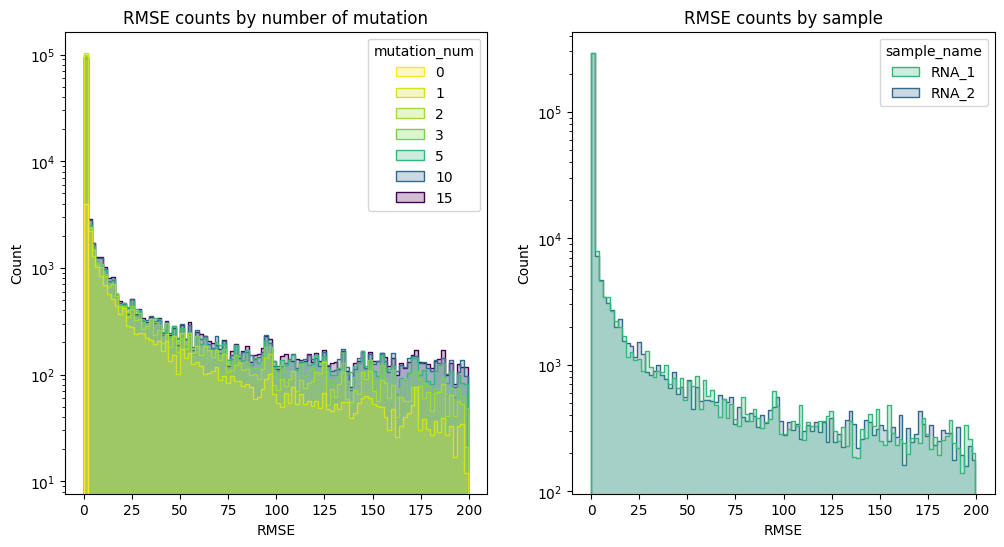

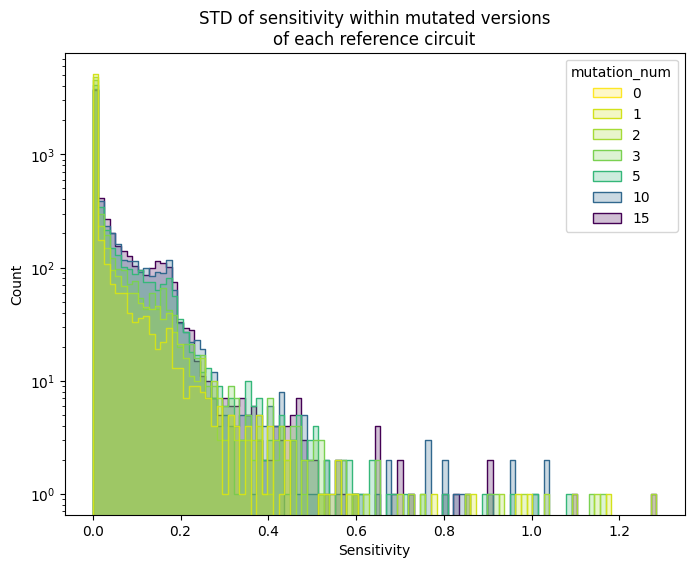

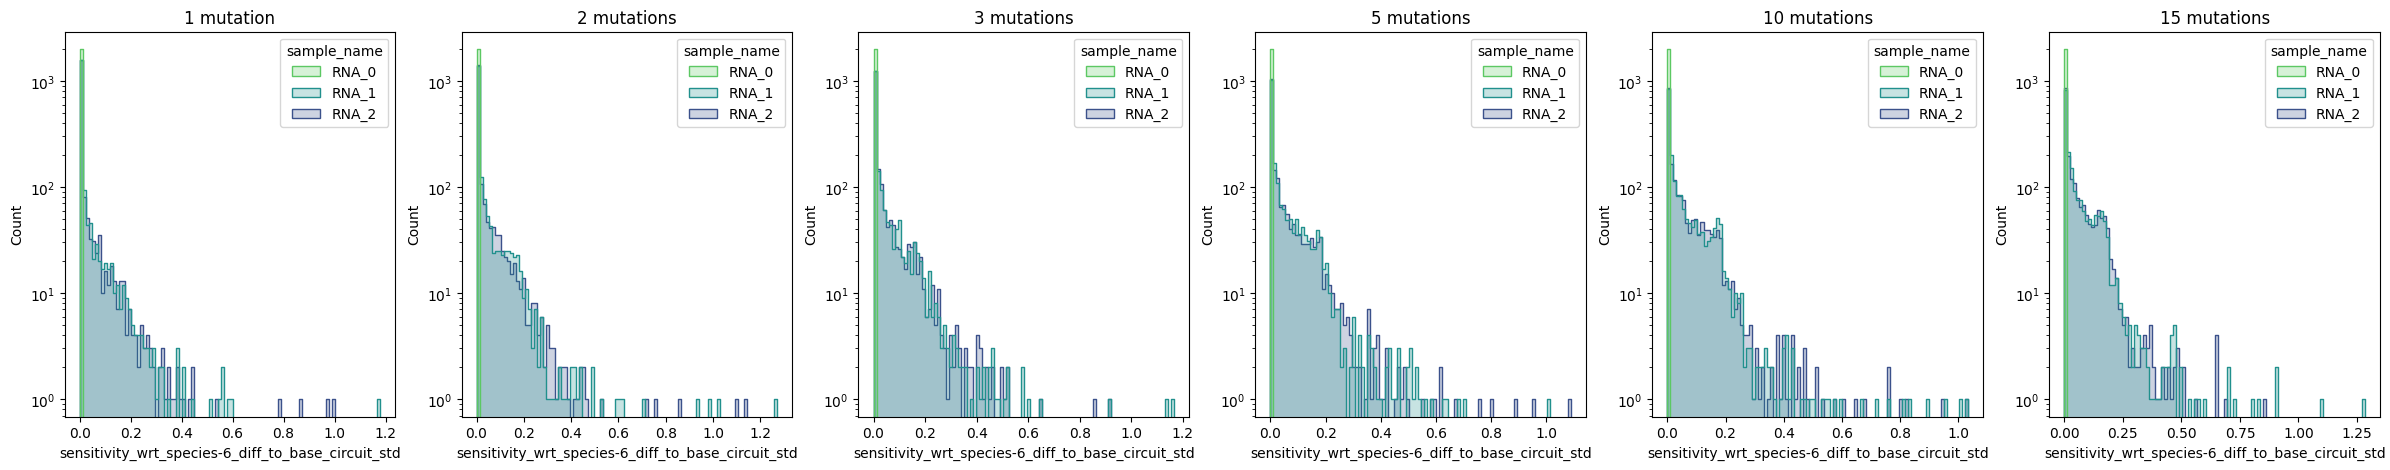

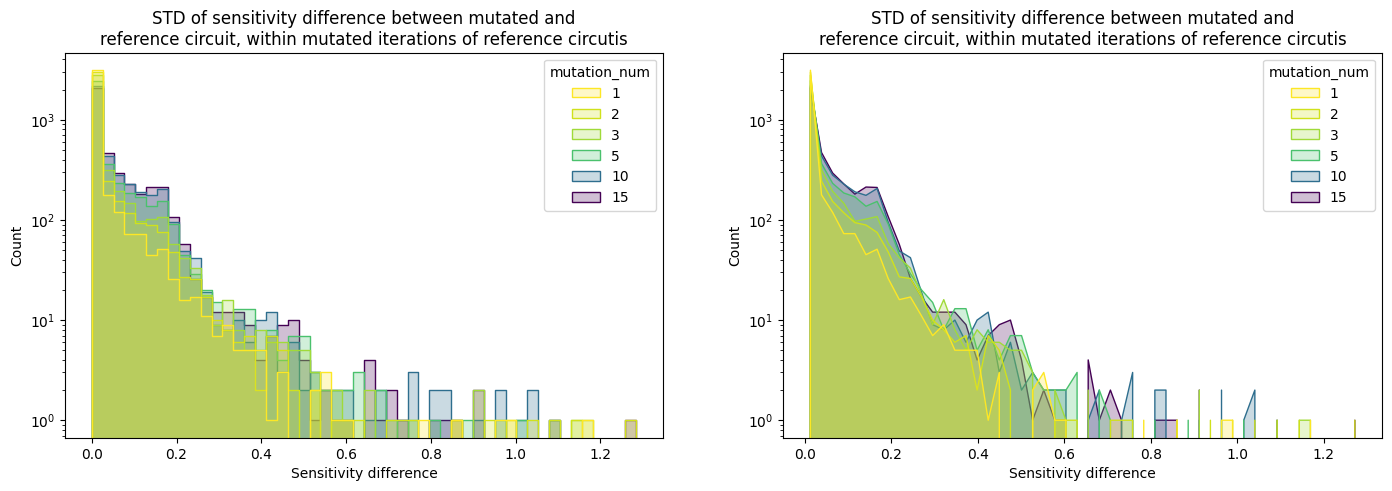

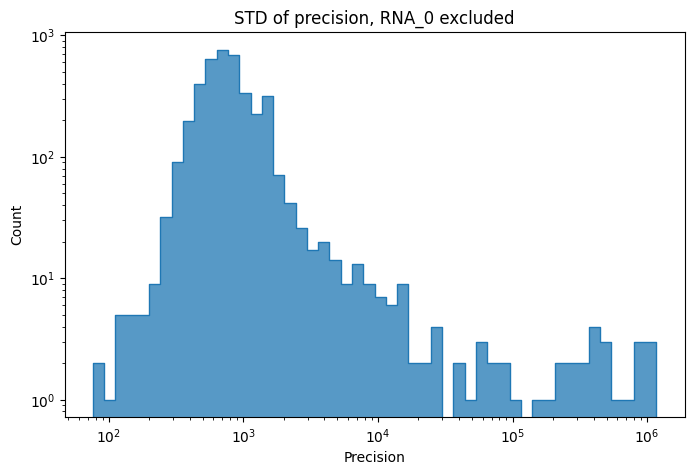

In [56]:


# %%
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
sns.histplot(data=info[info['sample_name'] != 'RNA_0'], x='RMSE', hue='mutation_num', element='step', palette='viridis_r', bins=100, log_scale=[False, True])
plt.title('RMSE counts by number of mutation')
ax = plt.subplot(1,2,2)
sns.histplot(info[info['sample_name'] != 'RNA_0'], x='RMSE', hue='sample_name', element='step', palette='viridis_r', bins=100, log_scale=[False, True])
plt.title('RMSE counts by sample')


# %%
plt.figure(figsize=(8,6))
sns.histplot(info_summ, x='sensitivity' + '_std', element='step', hue='mutation_num', log_scale=[False, True], palette='viridis_r', bins=100)
plt.xlabel('Sensitivity')
plt.title('STD of sensitivity within mutated versions\nof each reference circuit')

# %%
plt.figure(figsize=(5*len(info_summ['mutation_num'].unique()), 5))
for i, m in enumerate(info_summ['mutation_num'].unique()):
    if m != 0:
        ax = plt.subplot(1, len(info_summ['mutation_num'].unique()), i)
        sns.histplot(info_summ[info_summ['mutation_num'] == m], x='sensitivity_diff_to_base_circuit' + '_std', element='step', hue='sample_name', log_scale=[False, True], palette='viridis_r', bins=100)
        # plt.legend([str(m)], title='Mutations')
        plt.title(f'{str(m)} mutations' if m != 1 else '1 mutation')
        # plt.xlim([info_summ['sensitivity_diff_to_base_circuit' + '_std'].min() - 0.01, info_summ['sensitivity_diff_to_base_circuit' + '_std'].max() + 0.01])
        # plt.ylim([0,165])


# %%
plt.figure(figsize=(17,5))
ax = plt.subplot(1,2,1)
sns.histplot(info_summ[(info_summ['sensitivity_diff_to_base_circuit' + '_std'] > 0) & (info_summ['sample_name'] != 'RNA_0')], x='sensitivity_diff_to_base_circuit' + '_std', hue='mutation_num', element="step", bins=50, palette='viridis_r', log_scale=[False, True])
plt.title('STD of sensitivity difference between mutated and\nreference circuit, within mutated iterations of reference circutis')
plt.xlabel('Sensitivity difference')
ax = plt.subplot(1,2,2)
sns.histplot(info_summ[(info_summ['sensitivity_diff_to_base_circuit' + '_std'] > 0) & (info_summ['sample_name'] != 'RNA_0')], x='sensitivity_diff_to_base_circuit' + '_std', hue='mutation_num', element="poly", bins=50, palette='viridis_r', log_scale=[False, True])
plt.title('STD of sensitivity difference between mutated and\nreference circuit, within mutated iterations of reference circutis')
# plt.title('STD of sensitivity difference between\nmutated and reference circuit for each circuit')
plt.xlabel('Sensitivity difference')


plt.figure(figsize=(8,5))
# sns.histplot(info_summ[(info_summ['mutation_num'] != 0) & (info_summ['sample_name'] != 'RNA_0')], x='precision_diff_to_base_circuit' + '_std', hue='mutation_num', element="step", bins=50, log_scale=[True, False], palette='viridis_r')
s = info.groupby(['circuit_name', 'sample_name'], as_index=False).agg({c: 'std' for c in relevant_cols})
sns.histplot(s[(s['sample_name'] != 'RNA_0')], x='precision', element="step", bins=50, log_scale=[True, True], palette='viridis_r')
plt.xlabel('Precision')
plt.title('STD of precision, RNA_0 excluded')

Text(0.5, 0.98, 'Standard deviation of difference in $k_d$ between\nreference and mutated circuits, normed by mean')

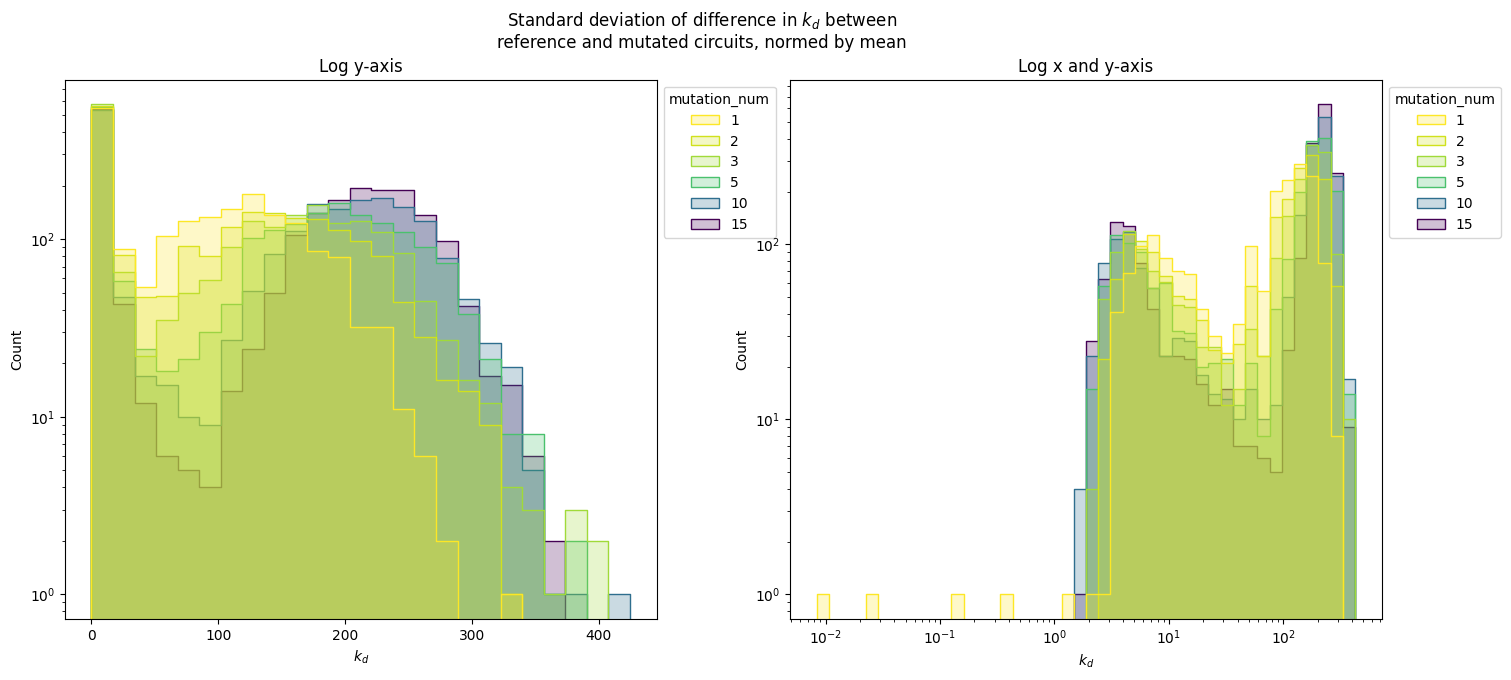

In [57]:

fig = plt.figure(figsize=(17,7))
fig.subplots_adjust(hspace=0.325, wspace=0.225)

ax = plt.subplot(1,2,1)
sns.histplot(info_summ_e[info_summ_e['binding_rates_dissociation_diffs_std_normed_by_mean'] > 0], x='binding_rates_dissociation_diffs_std_normed_by_mean', hue='mutation_num', element='step', log_scale=[False, True], palette='viridis_r')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('$k_d$')
plt.title('Log y-axis')

ax = plt.subplot(1,2,2)
sns.histplot(info_summ_e[info_summ_e['binding_rates_dissociation_diffs_std_normed_by_mean'] > 0], x='binding_rates_dissociation_diffs_std_normed_by_mean', hue='mutation_num', element='step', log_scale=[True, True], palette='viridis_r')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('$k_d$')
plt.title('Log x and y-axis')

plt.suptitle('Standard deviation of difference in $k_d$ between\nreference and mutated circuits, normed by mean')

Analytics

<AxesSubplot: xlabel='mutation_num', ylabel='fold_change_std_normed_by_mean'>

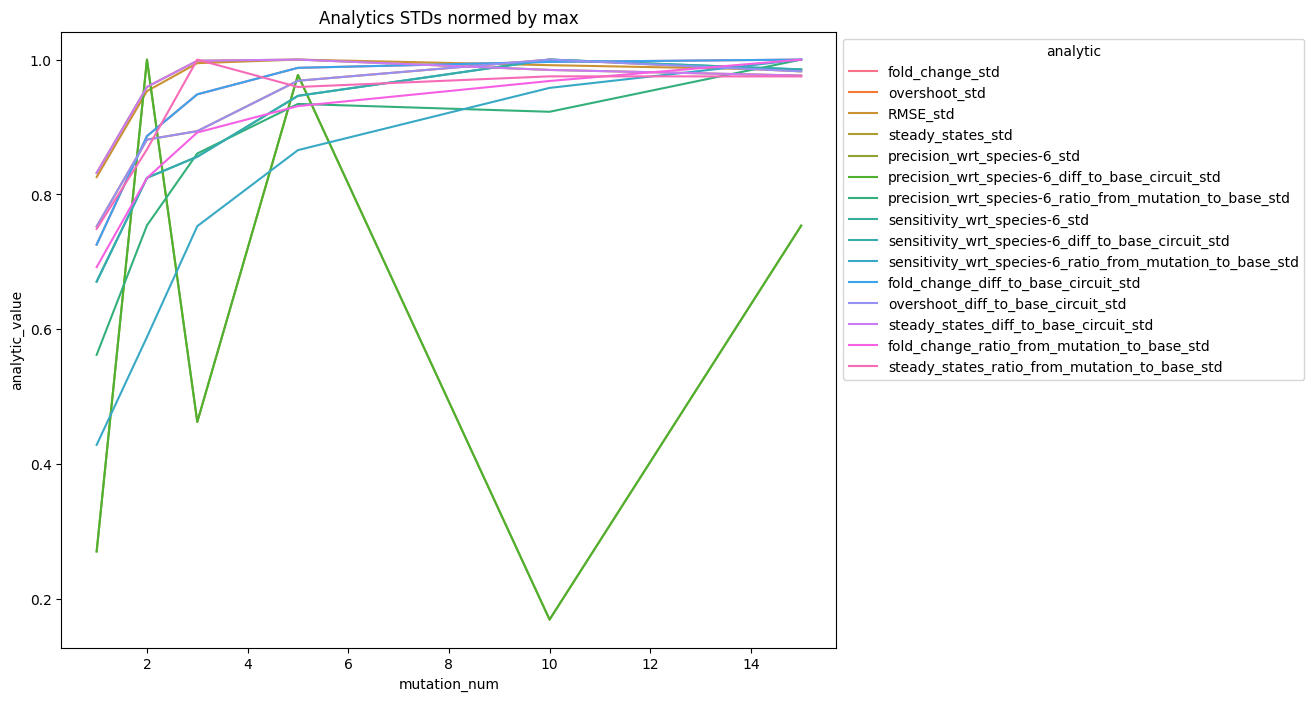

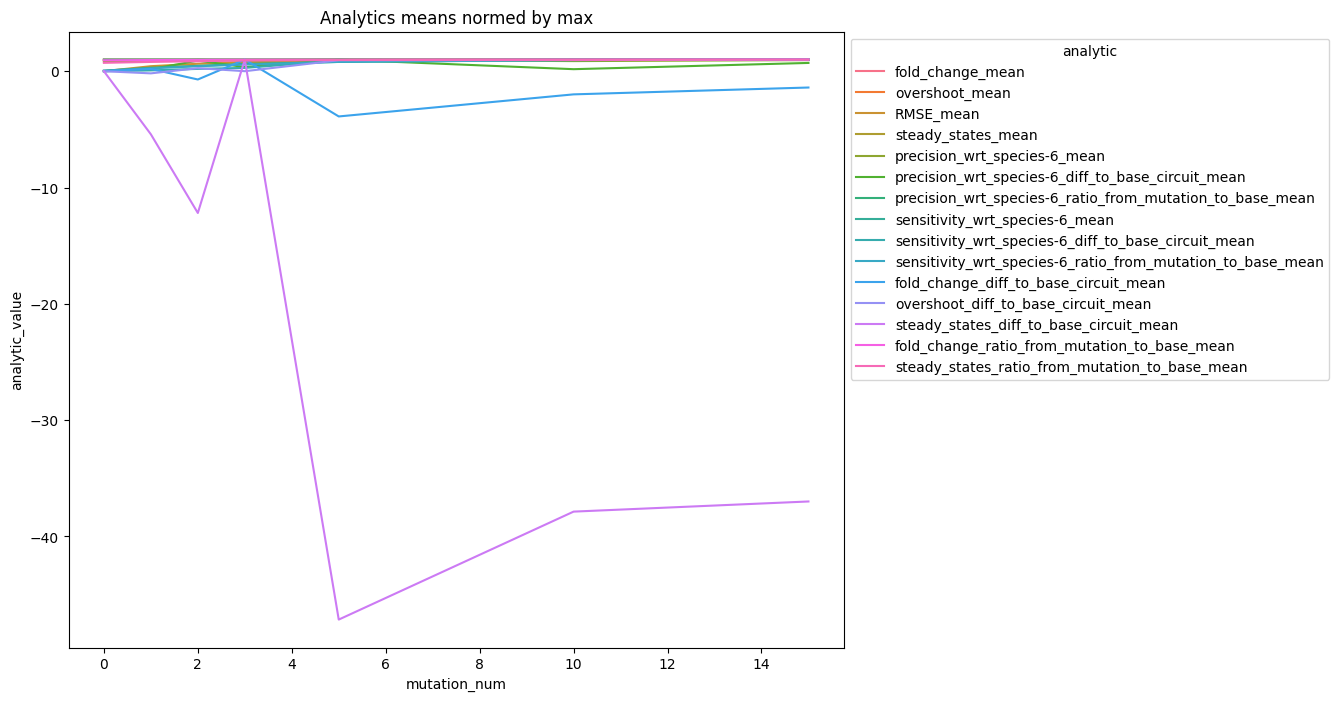

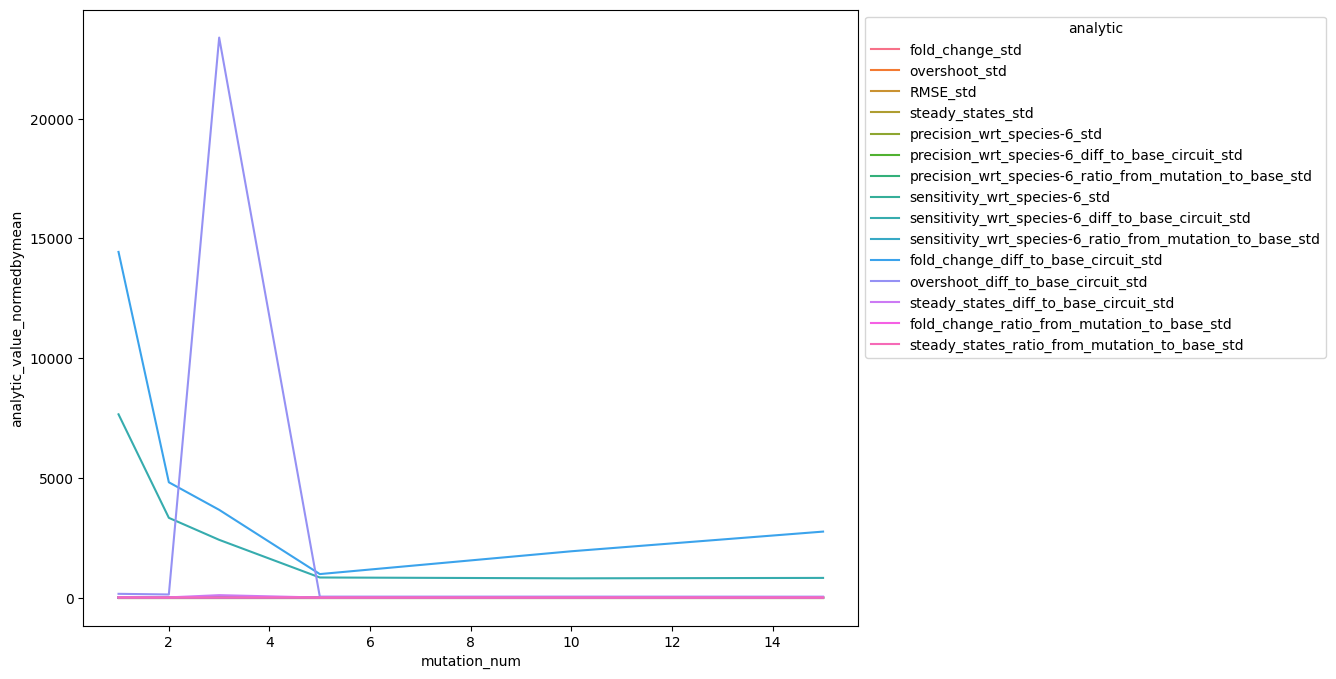

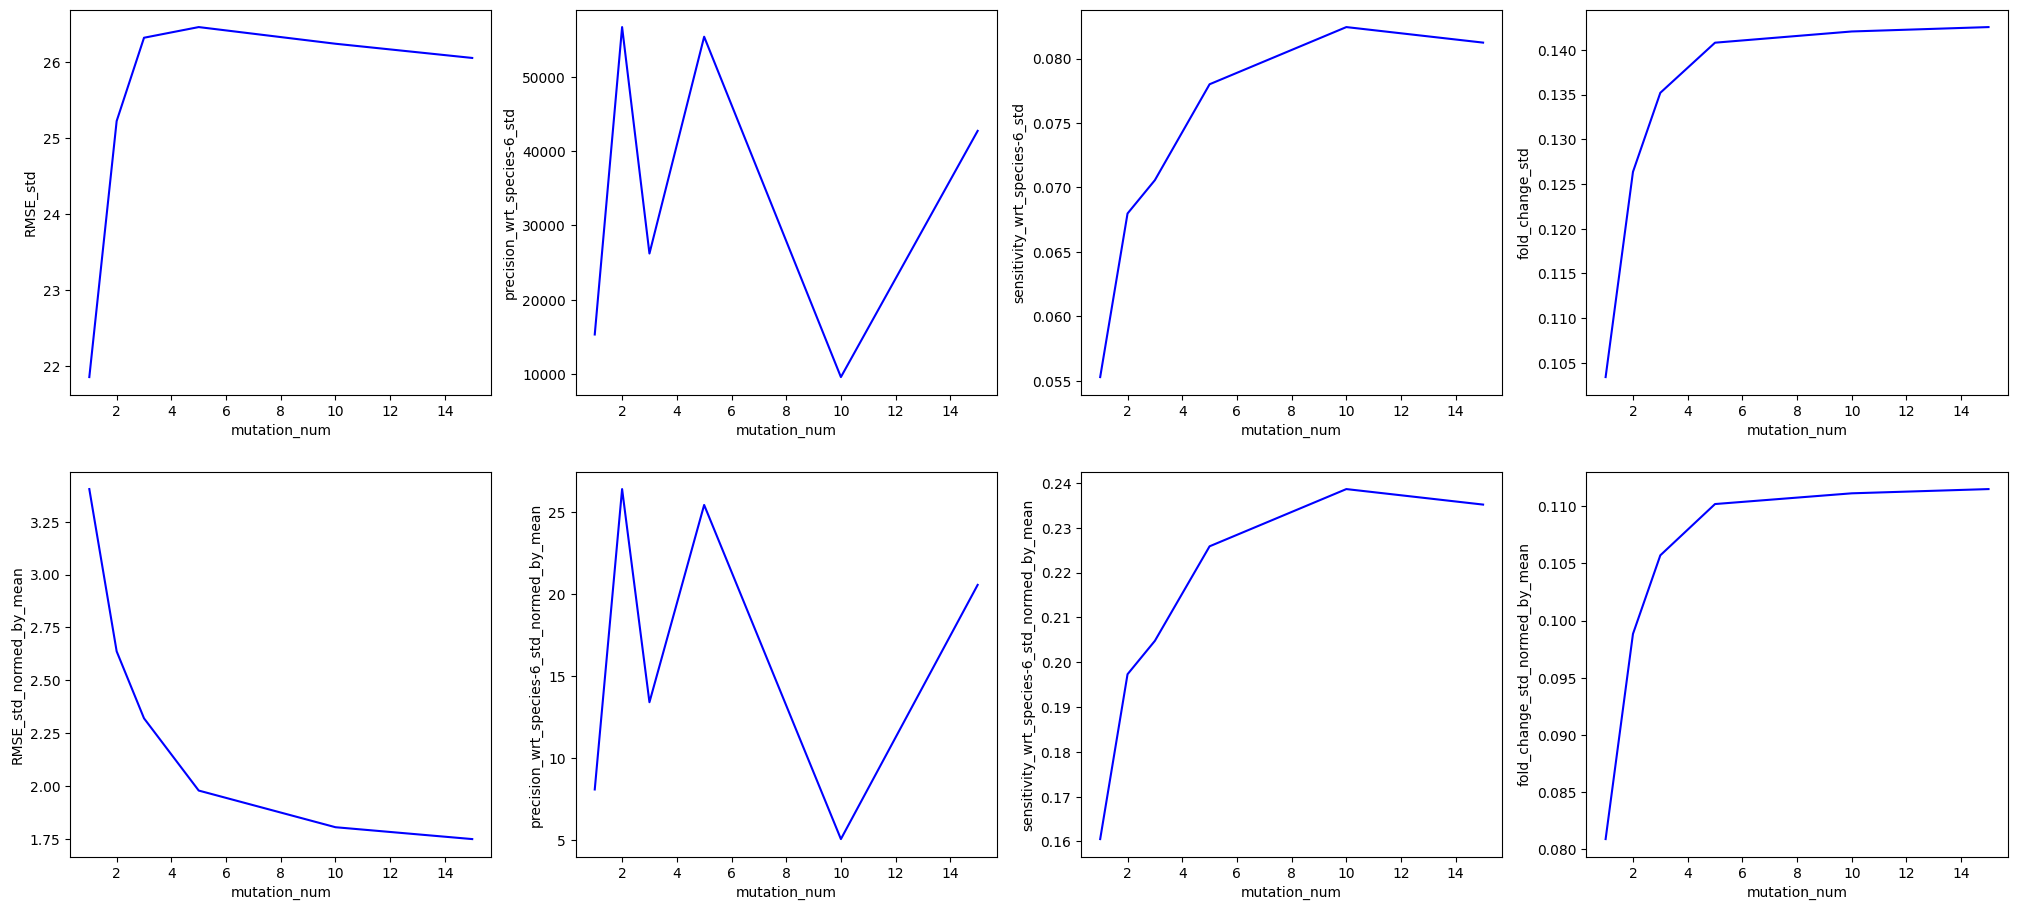

In [67]:

# %%
plt.figure(figsize=(10, 8))
ax = sns.lineplot(std_m2, 
             x='mutation_num', y='analytic_value', hue='analytic')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Analytics STDs normed by max')

plt.figure(figsize=(10, 8))
ax = sns.lineplot(mean_m2, 
             x='mutation_num', y='analytic_value', hue='analytic')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Analytics means normed by max')

plt.figure(figsize=(10, 8))
ax = sns.lineplot(std_m2, 
             x='mutation_num', y='analytic_value_normedbymean', hue='analytic')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


# %%
std_cols = ['RMSE',
            'precision',
            'sensitivity',
            'fold_change']
for sc in std_cols:
    stds[sc + '_std_normed_by_mean'] = stds[sc + '_std'] / means[sc + '_mean']

plt.figure(figsize=(25, 11))
ax = plt.subplot(2, 4, 1)
sns.lineplot(stds, x='mutation_num', y='RMSE' + '_std', color='b')
ax = plt.subplot(2, 4, 2)
sns.lineplot(stds, x='mutation_num', y=
    'precision' + '_std', color='b')
ax = plt.subplot(2, 4, 3)
sns.lineplot(stds, x='mutation_num', y=
    'sensitivity' + '_std', color='b')
ax = plt.subplot(2, 4, 4)
sns.lineplot(stds, x='mutation_num', y='fold_change' + '_std', color='b')

ax = plt.subplot(2, 4, 5)
sns.lineplot(stds, x='mutation_num', y='RMSE' + '_std_normed_by_mean', color='b')
ax = plt.subplot(2, 4, 6)
sns.lineplot(stds, x='mutation_num', y=
    'precision' + '_std_normed_by_mean', color='b')
ax = plt.subplot(2, 4, 7)
sns.lineplot(stds, x='mutation_num', y=
    'sensitivity' + '_std_normed_by_mean', color='b')
ax = plt.subplot(2, 4, 8)
sns.lineplot(stds, x='mutation_num', y='fold_change' + '_std_normed_by_mean', color='b')

# %%
# plt.figure(figsize=(8,5))
# sns.jointplot(info_summ[info_summ['sample_name'] != 'RNA_0'], x='RMSE' + '_std', y='precision_times_sensitivity' + '_mean', hue='mutation_num')

In [1]:
# info['robust'] = (info['sensitivity'] > 1) & (info['precision'] > 10)
# fig = px.scatter_3d(
#     info[info['mutation_num'] != 0],
#     x='sensitivity', y='precision', z='RMSE', 
#     color='robust', symbol='mutation_num', log_y=True, log_x=True)
# fig.show()


## Examine correlations

In [22]:

corrs = infom[infom['sample_name'] != 'RNA_0'].corr()['mutation_num'].sort_values()
# corrs.to_csv('corrs.csv')


/tmp/ipykernel_114975/1904057261.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

